# Aggregations: min, max, and Everything in Between

A first step in exploring any dataset is often to compute various summary statistics.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregations are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and try out some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in `sum` function:

In [ ]:
import numpy as np
rng = np.random.default_rng()

In [ ]:
L = rng.random(100)
sum(L)

50.048304827037164

The syntax is quite similar to that of NumPy's `sum` function, and the result is the same in the simplest case:

In [ ]:
np.sum(L)

50.048304827037164

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [ ]:
big_array = rng.random(1000)
print(big_array)
sum(big_array)
np.sum(big_array)

[0.83159354 0.7269463  0.80893363 0.59433216 0.12896537 0.5286233
 0.13606536 0.89835694 0.24567626 0.09273251 0.10779575 0.26428129
 0.87773796 0.88506788 0.04365535 0.29678235 0.63839486 0.80768991
 0.91230612 0.63792744 0.9735905  0.21728559 0.06258654 0.62597737
 0.09232424 0.0221423  0.8126823  0.68379214 0.31952744 0.72549887
 0.07382271 0.68561355 0.70114659 0.12165872 0.92411895 0.36700657
 0.10138358 0.46377908 0.1543102  0.59302033 0.00632665 0.36512485
 0.49290681 0.58978661 0.46073596 0.22267862 0.63375313 0.67054881
 0.09057335 0.37827594 0.83080705 0.35974417 0.98813414 0.4982926
 0.39438653 0.18163276 0.45348471 0.38269709 0.12929034 0.66619853
 0.10194231 0.36127232 0.77269792 0.84060175 0.47495658 0.04841585
 0.3732931  0.75474205 0.08577711 0.04757255 0.84561812 0.94648063
 0.78281981 0.80667169 0.86613557 0.14201585 0.83025658 0.70420787
 0.37637079 0.21296679 0.47206679 0.59531494 0.12232344 0.66069729
 0.34785932 0.9063592  0.7659833  0.5476233  0.8266919  0.213895

502.6150437867918

## Minimum and Maximum

Similarly, Python has built-in `min` and `max` functions, used to find the minimum value and maximum value of any given array:

In [ ]:
min(big_array), max(big_array)

(0.0011441395222843154, 0.9974441276800524)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [ ]:
np.min(big_array), np.max(big_array)

(0.0011441395222843154, 0.9974441276800524)

For `min`, `max`, `sum`, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

0.0011441395222843154 0.9974441276800524 502.6150437867918


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multidimensional Aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [ ]:
M = rng.integers(0, 10, (2, 4))
print(M)

[[6 1 3 1]
 [5 8 8 2]]


NumPy aggregations will apply across all elements of a multidimensional array:

In [ ]:
M.sum()

34

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying `axis=0`:

In [ ]:
M.min(axis=0)

array([5, 1, 3, 1])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

array([6, 8])

The way the axis is specified here can be confusing to users coming from other languages.
The `axis` keyword specifies the dimension of the array that will be *collapsed*, rather than the dimension that will be returned.
So, specifying `axis=0` means that axis 0 will be collapsed: for two-dimensional arrays, values within each column will be aggregated.

### Other Aggregation Functions

NumPy provides several other aggregation functions with a similar API, and additionally most have a `NaN`-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value (see [Handling Missing Data](03.04-Missing-Values.ipynb)).

The following table provides a list of useful aggregation functions available in NumPy:

|Function name    |   NaN-safe version| Description                                   |
|-----------------|-------------------|-----------------------------------------------|
| `np.sum`        | `np.nansum`       | Compute sum of elements                       |
| `np.prod`       | `np.nanprod`      | Compute product of elements                   |
| `np.mean`       | `np.nanmean`      | Compute mean of elements                      |
| `np.std`        | `np.nanstd`       | Compute standard deviation                    |
| `np.var`        | `np.nanvar`       | Compute variance                              |
| `np.min`        | `np.nanmin`       | Find minimum value                            |
| `np.max`        | `np.nanmax`       | Find maximum value                            |
| `np.argmin`     | `np.nanargmin`    | Find index of minimum value                   |
| `np.argmax`     | `np.nanargmax`    | Find index of maximum value                   |
| `np.median`     | `np.nanmedian`    | Compute median of elements                    |
| `np.percentile` | `np.nanpercentile`| Compute rank-based statistics of elements     |
| `np.any`        | N/A               | Evaluate whether any elements are true        |
| `np.all`        | N/A               | Evaluate whether all elements are true        |

You will see these aggregates often throughout the rest of the book.

In [ ]:
import numpy as np

# Create a sample NumPy array with NaN values
arr = np.array([1, 2, np.nan, 4, 5, np.nan])


Aggregation Functions:

Sum of elements:

In [ ]:
# Sum of elements
print(np.sum(arr))  # Output: NaN

# Sum ignoring NaNs
print(np.nansum(arr))  # Output: 12.0


nan
12.0


Product of elements:

In [ ]:
# Product of elements
print(np.prod(arr))  # Output: NaN

# Product ignoring NaNs
print(np.nanprod(arr))  # Output: 40.0


nan
40.0


Mean of elements

In [ ]:
# Mean of elements
print(np.mean(arr))  # Output: NaN

# Mean ignoring NaNs
print(np.nanmean(arr))  # Output: 3.0


nan
3.0


Standard deviation:

In [ ]:
# Standard deviation
print(np.std(arr))  # Output: NaN

# Standard deviation ignoring NaNs
print(np.nanstd(arr))  # Output: 1.825144705679587


nan
1.5811388300841898


Variance:

In [ ]:
# Variance
print(np.var(arr))  # Output: NaN

# Variance ignoring NaNs
print(np.nanvar(arr))  # Output: 3.3333333333333335


nan
2.5


Minimum value

In [ ]:
# Minimum value
print(np.min(arr))  # Output: NaN

# Minimum value ignoring NaNs
print(np.nanmin(arr))  # Output: 1.0


nan
1.0


Maximum value

In [ ]:
# Maximum value
print(np.max(arr))  # Output: NaN

# Maximum value ignoring NaNs
print(np.nanmax(arr))  # Output: 5.0


nan
5.0


Index of minimum value

In [ ]:
# Index of minimum value
print(np.argmin(arr))  # Output: 2 (index of NaN, as NaN is considered smallest)

# Index of minimum value ignoring NaNs
print(np.nanargmin(arr))  # Output: 0 (index of value 1)


2
0


Index of maximum value

In [ ]:
# Index of maximum value
print(np.argmax(arr))  # Output: 4 (index of 5)

# Index of maximum value ignoring NaNs
print(np.nanargmax(arr))  # Output: 4 (index of 5)


2
4


Median of elements:

In [ ]:
# Median of elements
print(np.median(arr))  # Output: NaN

# Median ignoring NaNs
print(np.nanmedian(arr))  # Output: 3.0


nan
3.0


Percentile of elements:

In [ ]:
# Percentile of elements (e.g., 50th percentile or median)
print(np.percentile(arr, 50))  # Output: NaN

# Percentile ignoring NaNs (e.g., 50th percentile or median)
print(np.nanpercentile(arr, 50))  # Output: 3.0


nan
3.0


Evaluate whether any elements are true:

In [ ]:
# Check if any element is True
print(np.any(arr))  # Output: True (since there are non-zero values)


True


Evaluate whether all elements are true:

In [ ]:
# Check if all elements are True
print(np.all(arr))  # Output: False (since there are NaN values)


True


In [ ]:
import numpy as np

# Create a sample NumPy array with NaN values
arr = np.array([1, 2, np.nan, 4, 5, np.nan])

# Aggregation functions
print("Sum ignoring NaNs:", np.nansum(arr))
print("Product ignoring NaNs:", np.nanprod(arr))
print("Mean ignoring NaNs:", np.nanmean(arr))
print("Standard deviation ignoring NaNs:", np.nanstd(arr))
print("Variance ignoring NaNs:", np.nanvar(arr))
print("Min ignoring NaNs:", np.nanmin(arr))
print("Max ignoring NaNs:", np.nanmax(arr))
print("Index of min ignoring NaNs:", np.nanargmin(arr))
print("Index of max ignoring NaNs:", np.nanargmax(arr))
print("Median ignoring NaNs:", np.nanmedian(arr))
print("50th Percentile ignoring NaNs:", np.nanpercentile(arr, 50))
print("Any True:", np.any(arr))
print("All True:", np.all(arr))


Sum ignoring NaNs: 12.0
Product ignoring NaNs: 40.0
Mean ignoring NaNs: 3.0
Standard deviation ignoring NaNs: 1.5811388300841898
Variance ignoring NaNs: 2.5
Min ignoring NaNs: 1.0
Max ignoring NaNs: 5.0
Index of min ignoring NaNs: 0
Index of max ignoring NaNs: 4
Median ignoring NaNs: 3.0
50th Percentile ignoring NaNs: 3.0
Any True: True
All True: True


## Example: What Is the Average Height of US Presidents?

Aggregates available in NumPy can act as summary statistics for a set of values.
As a small example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a comma-separated list of labels and values:

#MODULE 2

In [ ]:

import pandas as pd

# Series Example
data_series = pd.Series([10, 20, 30, 40], index=['A', 'B', 'C', 'D'])
print("Series:\n", data_series)

# DataFrame Example
data_frame = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
})
print("\nDataFrame:\n", data_frame)

Series:
 A    10
B    20
C    30
D    40
dtype: int64

DataFrame:
       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [ ]:

# Example DataFrame
data = {'Cab_ID': [1, 2, 3], 'Driver': ['Alice', 'Bob', 'Charlie'], 'Fare': [15.5, 20.0, 30.0]}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Selecting with loc (label-based)
print("\nSelect row by label with .loc:")
print(df.loc[1])  # Selects the row with index label 1

# Selecting with iloc (integer-location based)
print("\nSelect row by position with .iloc:")
print(df.iloc[2])  # Selects the third row

Original DataFrame:
    Cab_ID   Driver  Fare
0       1    Alice  15.5
1       2      Bob  20.0
2       3  Charlie  30.0

Select row by label with .loc:
Cab_ID       2
Driver     Bob
Fare      20.0
Name: 1, dtype: object

Select row by position with .iloc:
Cab_ID          3
Driver    Charlie
Fare         30.0
Name: 2, dtype: object


In [ ]:

# Adding a new column by broadcasting
df['Discounted_Fare'] = df['Fare'] * 0.9
print("\nDataFrame after operation:\n", df)

# Aggregation (mean of Fare column)
mean_fare = df['Fare'].mean()
print("\nMean Fare:", mean_fare)


DataFrame after operation:
    Cab_ID   Driver  Fare  Discounted_Fare
0       1    Alice  15.5            13.95
1       2      Bob  20.0            18.00
2       3  Charlie  30.0            27.00

Mean Fare: 21.833333333333332


In [ ]:

# Introducing missing values
df.loc[1, 'Fare'] = None
print("\nDataFrame with missing data:\n", df)

# Check missing data
print("\nMissing Data Check:\n", df.isna())

# Fill missing data
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
print("\nDataFrame after filling missing data:\n", df)


DataFrame with missing data:
    Cab_ID   Driver  Fare  Discounted_Fare
0       1    Alice  15.5            13.95
1       2      Bob   NaN            18.00
2       3  Charlie  30.0            27.00

Missing Data Check:
    Cab_ID  Driver   Fare  Discounted_Fare
0   False   False  False            False
1   False   False   True            False
2   False   False  False            False

DataFrame after filling missing data:
    Cab_ID   Driver   Fare  Discounted_Fare
0       1    Alice  15.50            13.95
1       2      Bob  22.75            18.00
2       3  Charlie  30.00            27.00


In [ ]:

# Creating a MultiIndex DataFrame
multi_index_data = pd.DataFrame({
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles'],
    'Date': ['2025-01-01', '2025-01-02', '2025-01-01', '2025-01-02'],
    'Fare': [15.0, 20.0, 30.0, 35.0]
}).set_index(['City', 'Date'])
print("\nHierarchical Indexing DataFrame:\n", multi_index_data)

# Accessing data using hierarchical index
print("\nData for New York:\n", multi_index_data.loc['New York'])


Hierarchical Indexing DataFrame:
                         Fare
City        Date            
New York    2025-01-01  15.0
            2025-01-02  20.0
Los Angeles 2025-01-01  30.0
            2025-01-02  35.0

Data for New York:
             Fare
Date            
2025-01-01  15.0
2025-01-02  20.0


In [ ]:

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(url)
print(df.head())

                pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side

In [ ]:

import pandas as pd

# Load NYC Taxi Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("NYC Taxi Dataset:\n", df.head())

NYC Taxi Dataset:
                 pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  

In [ ]:

# Dataset as a DataFrame
print("\nDataset Info:")
print(df.info())

# Accessing a specific column as a Series
fare_amount_series = df['fare']
print("\nFare Amount as a Series:\n", fare_amount_series.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB
None

Fare Amount as a Series:
 0     7.0
1     5.0
2     7.5
3    27.0
4     

In [ ]:

# Select rows where fare is greater than $20
high_fare_rides = df[df['fare'] > 20]
print("\nRides with fare greater than $20:\n", high_fare_rides.head())


Rides with fare greater than $20:
                  pickup              dropoff  passengers  distance  fare  \
3   2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
22  2019-03-28 17:20:54  2019-03-28 17:55:57           1      9.82  31.5   
37  2019-03-21 18:41:58  2019-03-21 19:15:25           1      3.13  20.5   
40  2019-03-07 15:15:46  2019-03-07 15:50:14           1      7.51  27.0   
42  2019-03-30 23:59:14  2019-03-30 23:59:17           1      0.00  80.0   

      tip  tolls   total   color      payment        pickup_zone  \
3    6.15   0.00   36.95  yellow  credit card          Hudson Sq   
22   8.31   5.76   49.87  yellow  credit card  LaGuardia Airport   
37   0.00   0.00   24.80  yellow         cash    Lenox Hill East   
40   6.06   0.00   36.36  yellow  credit card           Flatiron   
42  20.08   0.00  100.38  yellow  credit card                NaN   

                     dropoff_zone pickup_borough dropoff_borough  
3                  Yorkville We

In [ ]:

# Select top 5 rows of 'fare' and 'distance'
selected_data = df.loc[:4, ['fare', 'distance']]
print("\nSelected 'fare' and 'distance':\n", selected_data)


Selected 'fare' and 'distance':
    fare  distance
0   7.0      1.60
1   5.0      0.79
2   7.5      1.37
3  27.0      7.70
4   9.0      2.16


In [ ]:

# Group data by payment type and calculate average fare
avg_fare_per_payment = df.groupby('payment')['fare'].mean()
print("\nAverage Fare per Payment Type:\n", avg_fare_per_payment)

# Group by both pickup and dropoff and find total passengers
total_passengers = df.groupby(['pickup', 'dropoff'])['passengers'].sum()
print("\nTotal Passengers by Pickup and Dropoff:\n", total_passengers.head())


Average Fare per Payment Type:
 payment
cash           11.592991
credit card    13.694750
Name: fare, dtype: float64

Total Passengers by Pickup and Dropoff:
 pickup               dropoff            
2019-02-28 23:29:03  2019-02-28 23:32:35    1
2019-03-01 00:03:29  2019-03-01 00:13:32    3
2019-03-01 00:08:32  2019-03-01 00:29:47    3
2019-03-01 00:15:53  2019-03-01 00:47:58    1
2019-03-01 00:29:22  2019-03-01 00:32:48    4
Name: passengers, dtype: int64


In [ ]:

avg_fare_per_payment = df.groupby('payment')['fare'].mean()
print("\nAverage Fare per Payment Type:\n", avg_fare_per_payment)


Average Fare per Payment Type:
 payment
cash           11.592991
credit card    13.694750
Name: fare, dtype: float64


In [ ]:

median_fare_per_payment = df.groupby('payment')['fare'].median()
print("\nMedian Fare per Payment Type:\n", median_fare_per_payment)


Median Fare per Payment Type:
 payment
cash           8.5
credit card    9.5
Name: fare, dtype: float64


In [ ]:

std_fare_per_payment = df.groupby('payment')['fare'].std()
print("\nStandard Deviation of Fare per Payment Type:\n", std_fare_per_payment)


Standard Deviation of Fare per Payment Type:
 payment
cash           11.244216
credit card    11.599355
Name: fare, dtype: float64


In [ ]:

min_fare_per_payment = df.groupby('payment')['fare'].min()
max_fare_per_payment = df.groupby('payment')['fare'].max()

print("\nMinimum Fare per Payment Type:\n", min_fare_per_payment)
print("\nMaximum Fare per Payment Type:\n", max_fare_per_payment)


Minimum Fare per Payment Type:
 payment
cash           1.0
credit card    2.5
Name: fare, dtype: float64

Maximum Fare per Payment Type:
 payment
cash           150.0
credit card    120.0
Name: fare, dtype: float64


In [ ]:

count_per_payment = df.groupby('payment')['fare'].count()
print("\nCount of Entries per Payment Type:\n", count_per_payment)


Count of Entries per Payment Type:
 payment
cash           1812
credit card    4577
Name: fare, dtype: int64


In [ ]:

total_fare_per_payment = df.groupby('payment')['fare'].sum()
print("\nTotal Fare per Payment Type:\n", total_fare_per_payment)


Total Fare per Payment Type:
 payment
cash           21006.50
credit card    62680.87
Name: fare, dtype: float64


In [ ]:
fare_aggregates = df.groupby('payment')['fare'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print("\nFare Aggregates per Payment Type:\n", fare_aggregates)


Fare Aggregates per Payment Type:
                   mean  median        std  min    max  count
payment                                                     
cash         11.592991     8.5  11.244216  1.0  150.0   1812
credit card  13.694750     9.5  11.599355  2.5  120.0   4577


In [ ]:

multi_group_stats = df.groupby(['pickup', 'dropoff'])['fare'].agg(['sum', 'mean', 'count'])
print("\nFare Statistics by Pickup and Dropoff:\n", multi_group_stats.head())


Fare Statistics by Pickup and Dropoff:
                                           sum  mean  count
pickup              dropoff                               
2019-02-28 23:29:03 2019-02-28 23:32:35   5.0   5.0      1
2019-03-01 00:03:29 2019-03-01 00:13:32  10.0  10.0      1
2019-03-01 00:08:32 2019-03-01 00:29:47  22.5  22.5      1
2019-03-01 00:15:53 2019-03-01 00:47:58  25.5  25.5      1
2019-03-01 00:29:22 2019-03-01 00:32:48   4.5   4.5      1


In [ ]:
fare_percentage = df.groupby('payment')['fare'].sum() / df['fare'].sum() * 100
print("\nPercentage Contribution of Fare per Payment Type:\n", fare_percentage)


Percentage Contribution of Fare per Payment Type:
 payment
cash           24.943932
credit card    74.429694
Name: fare, dtype: float64


In [ ]:
# Fill missing payment types with 'Unknown' before grouping
df['payment'] = df['payment'].fillna('Unknown')
filled_avg_fare = df.groupby('payment')['fare'].mean()
print("\nAverage Fare per Payment Type (After Filling Missing Data):\n", filled_avg_fare)


Average Fare per Payment Type (After Filling Missing Data):
 payment
Unknown        11.988636
cash           11.592991
credit card    13.694750
Name: fare, dtype: float64


In [ ]:

grouped_df = df.groupby('payment')['fare'].mean().reset_index()
print("\nFlat DataFrame of Average Fare per Payment Type:\n", grouped_df)


Flat DataFrame of Average Fare per Payment Type:
        payment       fare
0      Unknown  11.988636
1         cash  11.592991
2  credit card  13.694750


In [ ]:
def fare_range(series):
    return series.max() - series.min()

custom_stats = df.groupby('payment')['fare'].agg(['mean', fare_range])
print("\nCustom Fare Statistics per Payment Type:\n", custom_stats)


Custom Fare Statistics per Payment Type:
                   mean  fare_range
payment                           
Unknown      11.988636        69.5
cash         11.592991       149.0
credit card  13.694750       117.5


In [ ]:

sorted_avg_fare = df.groupby('payment')['fare'].mean().sort_values(ascending=False)
print("\nSorted Average Fare per Payment Type:\n", sorted_avg_fare)


Sorted Average Fare per Payment Type:
 payment
credit card    13.694750
Unknown        11.988636
cash           11.592991
Name: fare, dtype: float64


In [ ]:
normalized_fare = df.groupby('payment')['fare'].transform(lambda x: (x - x.mean()) / x.std())
df['normalized_fare'] = normalized_fare
print("\nData with Normalized Fare:\n", df[['fare', 'normalized_fare']].head())


Data with Normalized Fare:
    fare  normalized_fare
0   7.0        -0.577166
1   5.0        -0.586345
2   7.5        -0.534060
3  27.0         1.147068
4   9.0        -0.404742


In [ ]:
# Sort by fare in descending order
sorted_fares = df.sort_values(by='fare', ascending=False)
print("\nTop 5 Highest Fares:\n", sorted_fares[['fare', 'pickup', 'dropoff']].head())


Top 5 Highest Fares:
        fare               pickup              dropoff
5364  150.0  2019-03-17 16:59:17  2019-03-17 18:04:08
5648  150.0  2019-03-19 14:21:35  2019-03-19 15:51:28
4050  143.5  2019-03-13 14:05:19  2019-03-13 15:01:16
2231  130.0  2019-03-11 10:17:31  2019-03-11 11:03:55
622   120.0  2019-03-12 19:52:36  2019-03-12 19:52:55


In [ ]:
# Drop rows with any missing values
cleaned_data = df.dropna()
print("\nData after dropping rows with missing values:\n", cleaned_data.head())

# Find rows with missing values in 'distance' column
missing_distance = df[df['distance'].isna()]
print("\nRows with missing 'distance':\n", missing_distance)


Data after dropping rows with missing values:
                 pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  normalized_fare  
0    UN/Tur

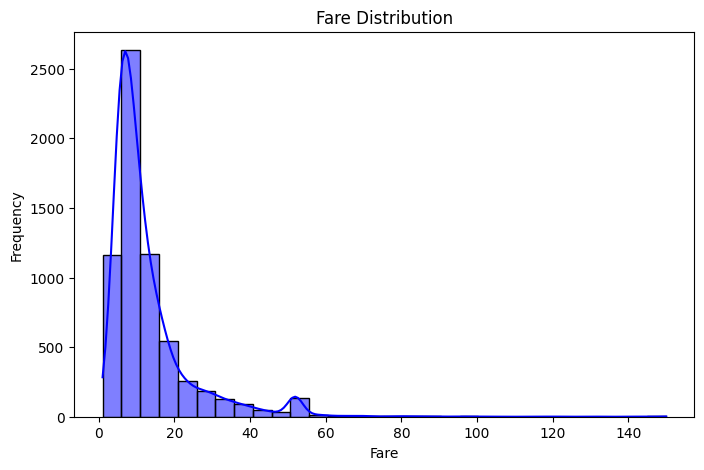

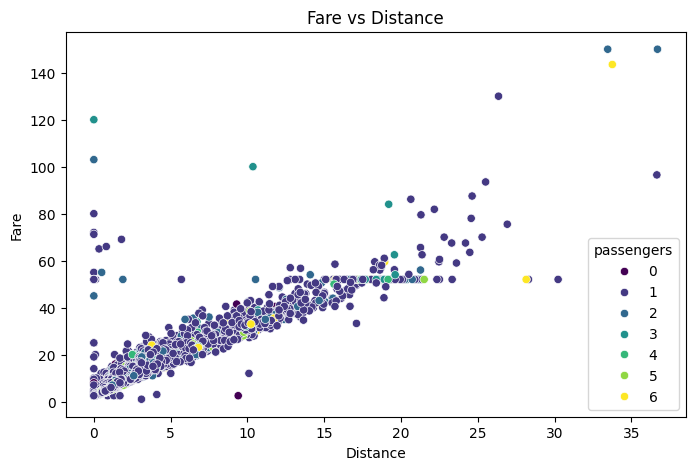

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of fares
plt.figure(figsize=(8, 5))
sns.histplot(df['fare'], kde=True, bins=30, color='blue')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of fare vs distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='distance', y='fare', hue='passengers', palette='viridis')
plt.title("Fare vs Distance")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.show()

In [ ]:
# Save the cleaned dataset
cleaned_data.to_csv('cleaned_taxi_data.csv', index=False)
print("Cleaned dataset exported as 'cleaned_taxi_data.csv'.")

Cleaned dataset exported as 'cleaned_taxi_data.csv'.


In [ ]:
# Add a column categorizing rides based on fare
def fare_category(fare):
    if fare < 10:
        return 'Low'
    elif fare < 30:
        return 'Medium'
    else:
        return 'High'

df['fare_category'] = df['fare'].apply(fare_category)
print("\nData with Fare Category:\n", df[['fare', 'fare_category']].head())


Data with Fare Category:
    fare fare_category
0   7.0           Low
1   5.0           Low
2   7.5           Low
3  27.0        Medium
4   9.0           Low


In [ ]:
# Pivot table for average fare by pickup and payment type
pivot_table = df.pivot_table(values='fare', index='pickup', columns='payment', aggfunc='mean')
print("\nPivot Table:\n", pivot_table)


Pivot Table:
 payment              Unknown  cash  credit card
pickup                                         
2019-02-28 23:29:03      NaN   5.0          NaN
2019-03-01 00:03:29      NaN   NaN         10.0
2019-03-01 00:08:32      NaN   NaN         22.5
2019-03-01 00:15:53      NaN   NaN         25.5
2019-03-01 00:29:22      NaN   NaN          4.5
...                      ...   ...          ...
2019-03-31 22:13:37      NaN   NaN          7.5
2019-03-31 22:32:27      NaN   NaN          3.5
2019-03-31 22:51:53      NaN   NaN          4.5
2019-03-31 23:15:03      NaN   NaN         11.5
2019-03-31 23:43:45      NaN  37.0          NaN

[6414 rows x 3 columns]


In [ ]:

# Group data by pickup and dropoff
hierarchical_data = df.groupby(['pickup', 'dropoff'])['fare'].mean().unstack()
print("\nHierarchical Data (Average Fare):\n", hierarchical_data)


Hierarchical Data (Average Fare):
 dropoff              2019-02-28 23:32:35  2019-03-01 00:13:32  \
pickup                                                          
2019-02-28 23:29:03                  5.0                  NaN   
2019-03-01 00:03:29                  NaN                 10.0   
2019-03-01 00:08:32                  NaN                  NaN   
2019-03-01 00:15:53                  NaN                  NaN   
2019-03-01 00:29:22                  NaN                  NaN   
...                                  ...                  ...   
2019-03-31 22:13:37                  NaN                  NaN   
2019-03-31 22:32:27                  NaN                  NaN   
2019-03-31 22:51:53                  NaN                  NaN   
2019-03-31 23:15:03                  NaN                  NaN   
2019-03-31 23:43:45                  NaN                  NaN   

dropoff              2019-03-01 00:29:47  2019-03-01 00:32:48  \
pickup                                               

In [ ]:
# Convert 'pickup_time' (if available) to datetime
if 'pickup_time' in df.columns:
    df['pickup_time'] = pd.to_datetime(df['pickup_time'])

    # Extract hour from timestamp
    df['hour'] = df['pickup_time'].dt.hour
    print("\nDataset with Hour Extracted:\n", df[['pickup_time', 'hour']].head())

#example plot

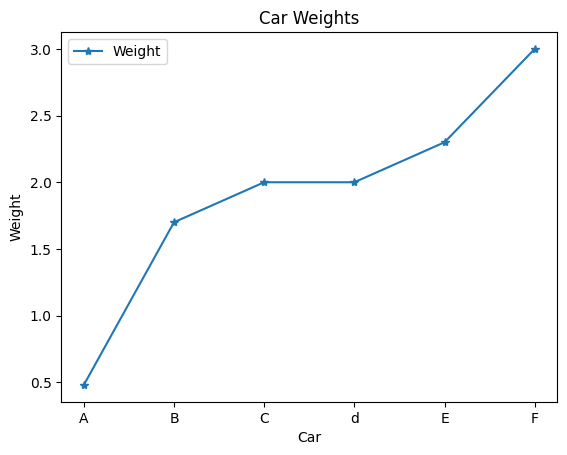

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

car = ["A", "B", "C", "d", "E", "F"]
weight = [0.48, 1.7, 2, 2, 2.3, 3]

# create a DataFrame
data = {'Car': car, 'Weight': weight}
df = pd.DataFrame(data)

# plot using Pandas
df.plot(x='Car', y='Weight', kind='line', marker='*')
plt.xlabel('Car')
plt.ylabel('Weight')
plt.title('Car Weights')
plt.show()

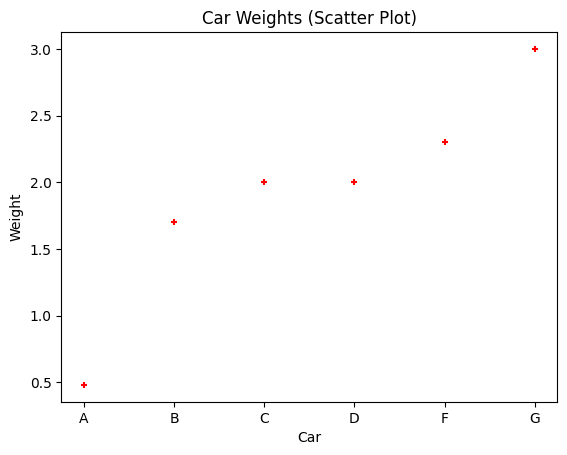

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

car = ["A", "B", "C", "D", "F", "G"]
weight = [0.48, 1.7, 2, 2, 2.3, 3]

# create a DataFrame
data = {'Car': car, 'Weight': weight}
df = pd.DataFrame(data)

# scatter plot using Pandas
df.plot(x='Car', y='Weight', kind='scatter', marker='+', color='red')
plt.xlabel('Car')
plt.ylabel('Weight')
plt.title('Car Weights (Scatter Plot)')
#plt.grid(True)
plt.show()

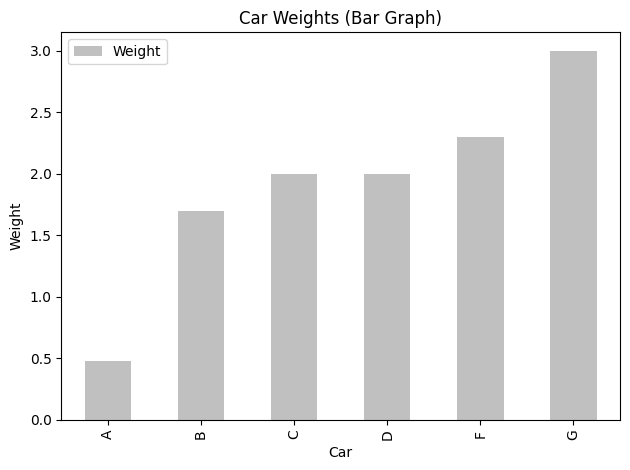

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

car = ["A", "B", "C", "D", "F", "G"]
weight = [0.48, 1.7, 2, 2, 2.3, 3]

# create a DataFrame
data = {'Car': car, 'Weight': weight}
df = pd.DataFrame(data)

# bar graph using Pandas
df.plot(x='Car', y='Weight', kind='bar', color='silver')
plt.xlabel('Car')
plt.ylabel('Weight')
plt.title('Car Weights (Bar Graph)')
plt.tight_layout()
plt.show()

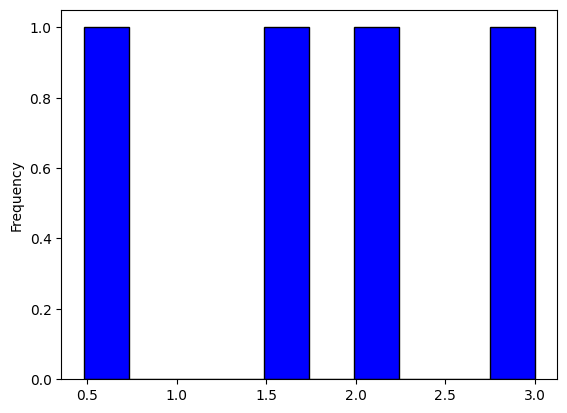

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

weight = [0.48, 1.7, 2, 3]

# create a DataFrame
data = {'Weight': weight}
df = pd.DataFrame(data)

# histogram using Pandas
df['Weight'].plot(kind='hist', bins=10, edgecolor='black', color='blue')
plt.show()

In [ ]:
import pandas as pd

data_dict = {'name': ['s1', 's2', 's3', 's4', 's5', 's6'],'age': [20, 20, 21, 20, 21, 20],'math_marks': [100, 90, 91, 98, 92, 95], 'physics_marks': [90, 100, 91, 92, 98, 95],'chem_marks': [93, 89, 99, 92, 94, 92]}
df = pd.DataFrame(data_dict)
df.head()

,name,age,math_marks,physics_marks,chem_marks
0,s1,20,100,90,93
1,s2,20,90,100,89
2,s3,21,91,91,99
3,s4,20,98,92,92
4,s5,21,92,98,94


Text(0, 0.5, 'Physics Marks')

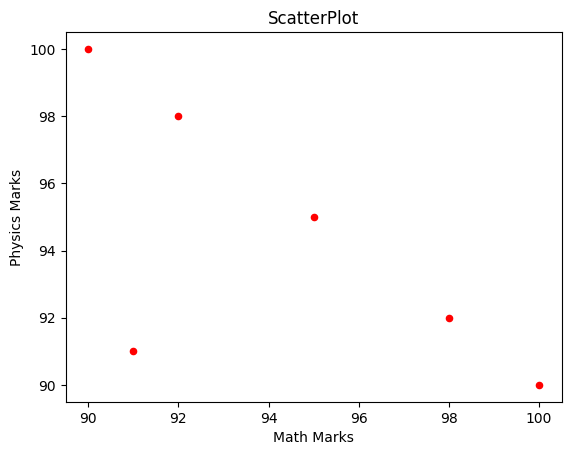

In [ ]:
# Scatter plot using pandas
ax = df.plot(kind='scatter', x='math_marks', y='physics_marks', color='red', title='ScatterPlot')

# Customizing plot elements
ax.set_xlabel("Math Marks")
ax.set_ylabel("Physics Marks")

<Axes: title={'center': 'Line Plots of Marks in Different Subjects'}, xlabel='name'>

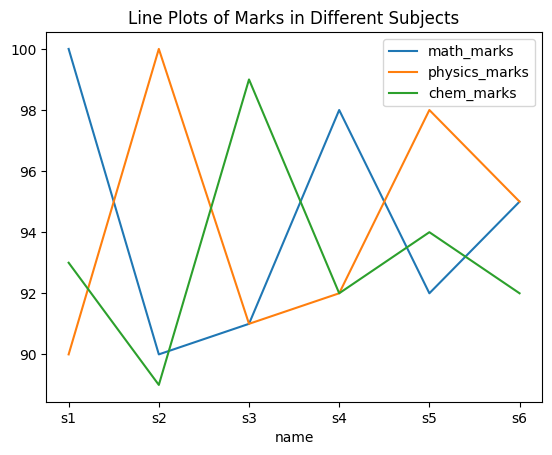

In [ ]:

# Plot multiple line plots using only pandas
df.plot(x='name', y=['math_marks', 'physics_marks', 'chem_marks'],
        kind='line',
        title='Line Plots of Marks in Different Subjects')

#Seed

In [ ]:
import random

# Always produces the same number with seed 30
print('Random number with seed 30')
for i in range(3):
    #random.seed(30)
    print(random.randint(25, 50))

Random number with seed 30
31
33
26


In [ ]:

import random

# Always produces the same number with seed 30
print('Random number with seed 30')
for i in range(3):
    random.seed(200)
    print(random.randint(125, 150))

Random number with seed 30
126
126
126


In [ ]:
import random

# Always produces the same number with seed 30
print('Random number with seed 30')
for i in range(2):
    print('Run', i,":")
    random.seed(30)
    for j in range(3):
        print(j, ":", random.randint(25, 50));

Random number with seed 30
Run 0 :
0 : 42
1 : 50
2 : 34
Run 1 :
0 : 42
1 : 50
2 : 34


In [ ]:

import random

# # Generate a random sequence of elements
# Always shuffles in the same way with seed 30
for i in range(2):
    random.seed(30)
    my_list = [10, 20, 30, 40, 50]
    random.shuffle(my_list)
    print(my_list)

[20, 10, 40, 30, 50]
[20, 10, 40, 30, 50]


In [ ]:

import random

random.seed(30)
print("first Number", random.randint(25, 50))

# generates a different random number
print("Second Number ", random.randint(25, 50))

# will generate a same random number as first one because seed value is same
random.seed(30)
print("Third Number", random.randint(25, 50))

first Number 42
Second Number  50
Third Number 42


In [ ]:
import random
from datetime import datetime

# Random number with system time
random.seed(datetime.now())
print("Random Number", random.randint(25, 50))
# Output 50

Random Number 31


<ipython-input-8-0a828869f927>:5: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.now())


In [ ]:

import random

# Random seed with randrange
random.seed(350)
print(random.randrange(300, 500))
# output 336

random.seed(350)
print(random.randrange(300, 500))
# Output 336

392
392


In [ ]:
import random
names = ["Alex", "Emma", "Kelly", "Scott", "Jessa"]

random.seed(50)
random_item = random.choice(names)
print ("First random name from list ", random_item)
# output scott

random.seed(50)
random_item = random.choice(names)
print ("Second random name from list ", random_item)
# output Scott

First random name from list  Scott
Second random name from list  Scott


#MODULE 3 BASIC OOP

In [ ]:

class Car:
    def __init__(self, brand, model):
        self.brand = brand  # Encapsulation
        self.model = model

    def display_info(self):  # Abstraction
        return f"Car Brand: {self.brand}, Model: {self.model}"

# Inheritance and Polymorphism
class ElectricCar(Car):
    def __init__(self, brand, model, battery_capacity):
        super().__init__(brand, model)
        self.battery_capacity = battery_capacity

    def display_info(self):  # Polymorphism
        return f"{super().display_info()}, Battery: {self.battery_capacity} kWh"

car1 = ElectricCar("Tesla", "Model S", 100)
print(car1.display_info())

Car Brand: Tesla, Model: Model S, Battery: 100 kWh


In [ ]:

class A:

    # class attribute
    name = ""
    age = 0

# create A1 object
A1 = A()
A1.name = "aa"
A1.age = 10

# create another object A2
A2 = A()
A2.name = "aaa"
A2.age = 15

# access attributes
print(f"{A1.name} is {A1.age} years old")
print(f"{A2.name} is {A2.age} years old")

aa is 10 years old
aaa is 15 years old


In [ ]:
# base class
class Animal:

    def eat(self):
        print( "I can eat!")

    def sleep(self):
        print("I can sleep!")

# derived class
class Dog(Animal):

    def bark(self):
        print("I can bark! Woof woof!!")

# Create object of the Dog class
dog1 = Dog()

# Calling members of the base class
dog1.eat()
dog1.sleep()

# Calling member of the derived class
dog1.bark();

I can eat!
I can sleep!
I can bark! Woof woof!!


In [ ]:

class Computer:

    def __init__(self):
        self.__maxprice = 900

    def sell(self):
        print("Selling Price: {}".format(self.__maxprice))

    def setMaxPrice(self, price):
        self.__maxprice = price

c = Computer()
c.sell()

# change the price
c.__maxprice = 1000
c.sell()

# using setter function
c.setMaxPrice(1000)
c.sell()

Selling Price: 900
Selling Price: 900
Selling Price: 1000


In [ ]:

class Polygon:
    # method to render a shape
    def render(self):
        print("Rendering Polygon...")

class Square(Polygon):
    # renders Square
    def render(self):
        print("Rendering Square...")

class Circle(Polygon):
    # renders circle
    def render(self):
        print("Rendering Circle...")

# create an object of Square
s1 = Square()
s1.render()

# create an object of Circle
c1 = Circle()
c1.render()

Rendering Square...
Rendering Circle...
